# Regressão Logística

Nesse desafio o objetivo é prever fraude em transações, criando e avaliando a performance de um modelo de Regressão Logística.

In [1]:
#importando bibliotecas e carregando pacotes
import numpy as np
import random
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

## Conjunto de dados

In [2]:
#importando o dataset 
df = pd.read_csv('creditcard.csv')

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))

O dataset possui 284807 linhas (registros) e 31 colunas (features)


In [3]:
#uma amostra do dataset
df.head(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#estatística descritiva
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Regressão Logística

In [5]:
#definindo varíaveis

#vetor de resposta
Y = df['Class']

#matriz de características
X = df.iloc[:, :-1]

In [6]:
X.shape

(284807, 30)

In [7]:
#dividindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5, stratify=Y, random_state=27)

In [8]:
#treinando regressão logística
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

/home/neto/.local/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/neto/.local/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/neto/.local/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/neto/.local/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/neto/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the numb

In [9]:
#scalando valores devido a problemas de convergência
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [10]:
#treinando regressão logística depois de scalar
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

In [11]:
#coeficientes
print("Intercept: \n", logreg.intercept_)
print('Coefficients: \n', logreg.coef_)

Intercept: 
 [-8.65487175]
Coefficients: 
 [[-2.54672482e-01  6.82408638e-02  8.55211044e-02 -7.07091059e-02
   9.80328401e-01  2.25838978e-01 -1.40399388e-01 -6.10158391e-02
  -1.75170887e-01 -3.68239442e-01 -6.09033070e-01 -1.47239162e-01
   2.06552495e-01 -4.87808562e-01 -6.63656515e-01  1.47544483e-02
  -8.81317253e-02 -1.22766164e-01 -9.82142139e-02 -7.72412891e-05
  -2.90561165e-01  3.16949494e-01  4.97078012e-01 -6.30602328e-02
   1.05022126e-01 -7.33412798e-02  5.68663882e-02 -3.29803175e-01
  -1.27807480e-01  2.18303892e-01]]


In [12]:
#prevendo probabilidades no conj de treinamento
y_prob = logreg.predict_proba(X_train)

y_prob.shape

(142403, 2)

In [13]:
#calculando erro no treinamento
log_loss(y_train, y_prob[:,1])

0.004188295469203299

In [14]:
#scalando valores no conjunto de teste
X_test=scaler.transform(X_test)

#prevendo probabilidades no conj de teste
y_prob = logreg.predict_proba(X_test)

y_prob.shape

(142404, 2)

In [15]:
y_prob=y_prob[:,1]

y_prob[:20]

array([7.58857707e-05, 5.71815173e-04, 1.85446369e-03, 2.68786643e-03,
       2.88401083e-04, 3.10362712e-05, 2.44543670e-05, 1.22395355e-03,
       5.42047573e-04, 1.16531939e-04, 8.03130573e-05, 9.99863997e-01,
       2.48519721e-04, 3.88492392e-04, 1.42459688e-04, 2.05104284e-04,
       2.33778237e-05, 7.31627044e-03, 5.83397979e-04, 4.36672376e-05])

In [16]:
#calculando erro no teste
log_loss(y_test,y_prob)

0.003793841439624264

### Regularização

In [17]:
#vetor de resposta
Y = df['Class']

#matriz de características
X = df.iloc[:, :-1]

#dividindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5, stratify=Y, random_state=27)

In [18]:
#escolhendo melhor hiperparâmetro
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1',solver='liblinear'))])
parameters = {'logreg__C': np.linspace(10**-5,10,100)}
 
gcv=GridSearchCV(pipe, parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
gcv.fit(X_train, y_train)

#visualizando o melhor valor e o escore associado
c=gcv.best_params_['logreg__C']

c, gcv.best_score_

(0.40405, -0.004439585496681179)

In [19]:
#treinando
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1', C=c, solver='liblinear'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.40405, penalty='l1',
                                    solver='liblinear'))])

In [20]:
#coeficientes
pipe['logreg'].intercept_[0]

-8.375045298585817

In [21]:
pipe['logreg'].coef_[0]

array([-1.19729133e-01,  0.00000000e+00,  1.92152846e-02, -1.05080138e-02,
        8.76715348e-01,  1.20467138e-01, -9.17940804e-02, -4.26000653e-02,
       -1.78568933e-01, -3.16962032e-01, -4.90175430e-01, -4.94687091e-02,
        5.39323114e-02, -3.93670121e-01, -6.29513669e-01,  0.00000000e+00,
       -9.13017396e-02, -7.85686307e-02, -7.30028282e-02, -5.75214935e-04,
       -1.96842673e-01,  2.77524476e-01,  4.01289428e-01, -6.17419543e-02,
        6.17119400e-02, -4.69559650e-02,  0.00000000e+00, -2.59503997e-01,
       -1.08643847e-01,  1.06297946e-01])

In [22]:
#acurácia do modelo em treinamento
np.mean(pipe['logreg'].coef_[0]!=0)

0.9

In [23]:
#predizendo probabilidades
y_prob = pipe.predict_proba(X_test)
y_prob = y_prob[:,1]

In [24]:
#verificando erro nos testes
log_loss(y_test,y_prob)

0.0037823008041831556

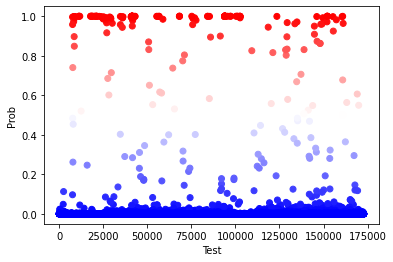

In [25]:
plt.scatter(X_test.iloc[:,0],y_prob,c=y_prob,cmap='bwr')

plt.xlabel('Test')
plt.ylabel('Prob')
#plt.show()
plt.savefig("erros.png")

## Classificação e Métricas de Avaliação

In [26]:
y_pred2=pipe.predict(X_test)

In [27]:
y_pred2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
#acurácia do modelo
np.mean(y_test==y_pred2)

0.9992205275132721

In [29]:
#matriz de confusão
cf_matrix=confusion_matrix(y_test, y_pred2)

In [30]:
cf_matrix

array([[142137,     21],
       [    90,    156]])

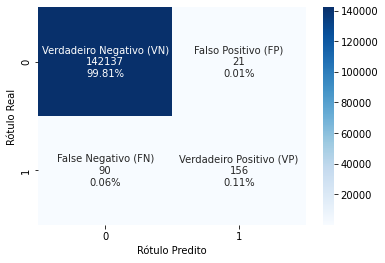

In [31]:
group_names = ['Verdadeiro Negativo (VN)','Falso Positivo (FP)','False Negativo (FN)','Verdadeiro Positivo (VP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Rótulo Predito")
plt.ylabel("Rótulo Real")
#plt.show()
plt.savefig("matrizconfusao.png")

In [32]:
#métricas de performance do classificador 
report=classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.63      0.74       246

    accuracy                           1.00    142404
   macro avg       0.94      0.82      0.87    142404
weighted avg       1.00      1.00      1.00    142404

